Step - 1
(**Noise Reduction**)

In [26]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

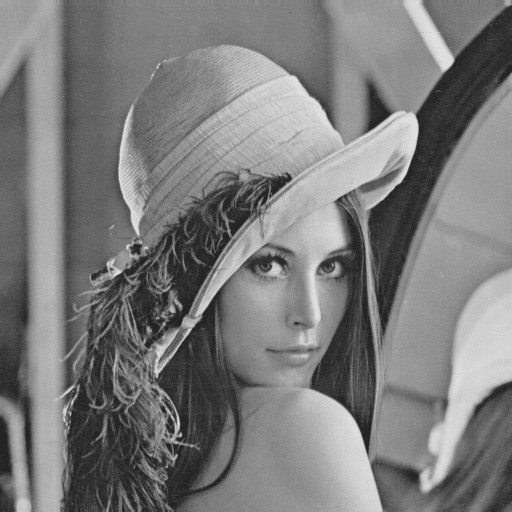

786432


In [43]:
img = cv2.imread("/content/drive/MyDrive/Sem-2/CV/lena.png")
cv2_imshow(img)
print(img.size)

<Figure size 432x288 with 0 Axes>

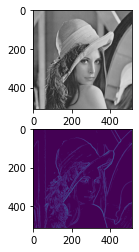

In [44]:

import matplotlib.pyplot as plt

def Canny_detector(img, weak_th = None, strong_th = None): 
      
    # conversion of image to grayscale 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
       
    # Noise reduction step 
    img = cv2.GaussianBlur(img, (5, 5), 0) 
       
    # Calculating the gradients 
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
      
    # Conversion of Cartesian coordinates to polar  
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
       
    # setting the minimum and maximum thresholds  
    # for double thresholding 
    mag_max = np.max(mag) 
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image   
    height, width = img.shape 
       
    # Looping through every pixel of the grayscale  
    # image 
    for i_x in range(width): 
        for i_y in range(height): 
               
            grad_ang = ang[i_y, i_x] 
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
               
            # selecting the neighbours of the target pixel 
            # according to the gradient direction 
            # In the x axis direction 
            if grad_ang<= 22.5: 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
              
            # top right (diagnol-1) direction 
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction 
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagnol-2) direction 
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle 
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
               
            # Non-maximum suppression step 
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)               
    ids = np.zeros_like(img) 
       
    # double thresholding step 
    for i_x in range(width): 
        for i_y in range(height): 
              
            grad_mag = mag[i_y, i_x] 
              
            if grad_mag<weak_th: 
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of 
    # gradients of edges 
    return mag 

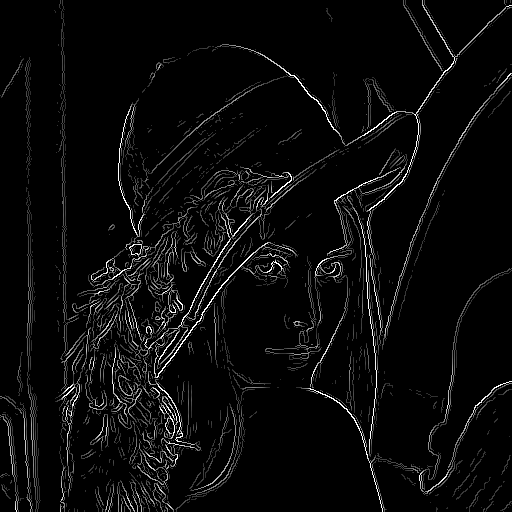

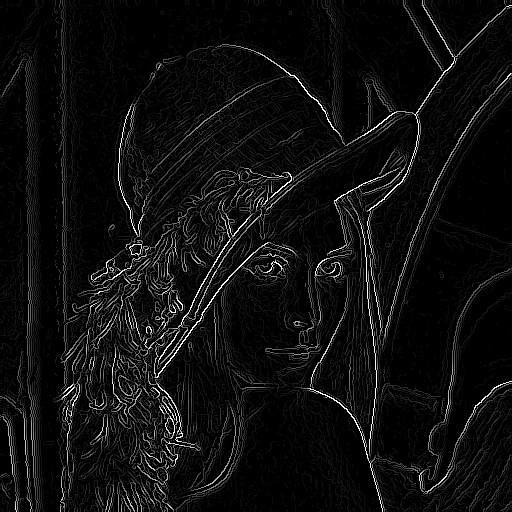

In [49]:
canny_img = Canny_detector(img)
canny_img_2 = Canny_detector(img,10,100)
cv2_imshow(canny_img)
cv2_imshow(canny_img_2)


Applying Canny on a dataset to enhance the image

In [50]:
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [53]:
folder = "/content/drive/MyDrive/Sem-2/CV/DB2_B"
images = load_images_from_folder(folder)

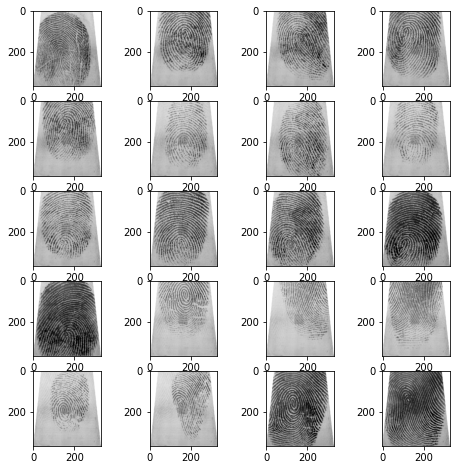

In [58]:
w=5
h=5
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i])
plt.show()

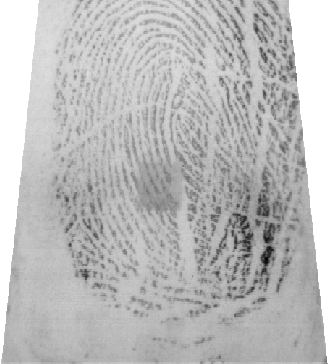

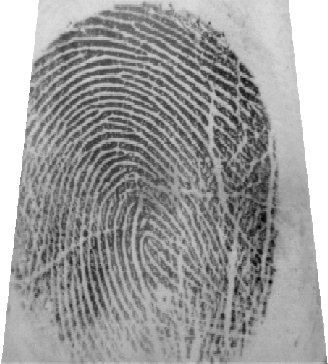

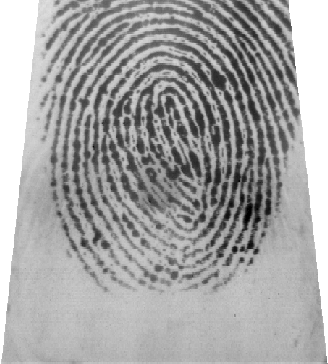

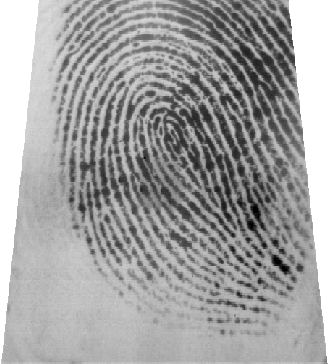

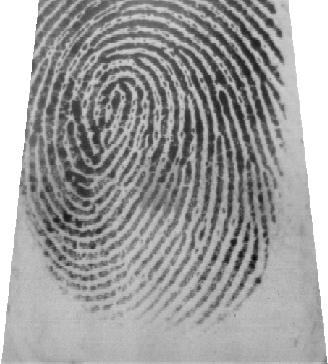

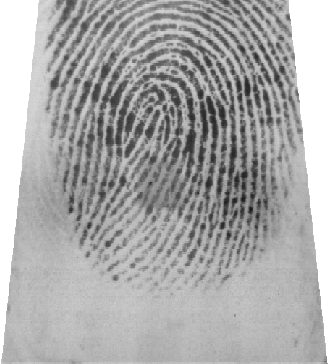

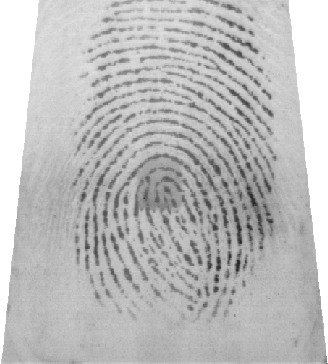

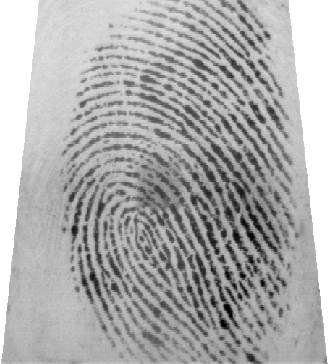

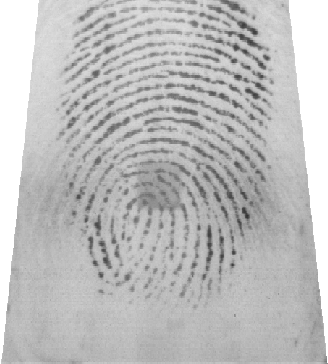

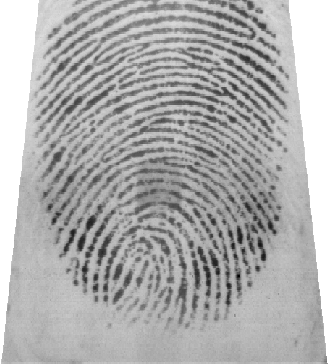

In [65]:
for i in range(10):
  cv2_imshow(images[i])

In [62]:
from tqdm import tqdm
CannyImages = []
for i in tqdm(range(len(images))):
  temp = Canny_detector(images[i])
  CannyImages.append(temp)

100%|██████████| 80/80 [00:28<00:00,  2.85it/s]


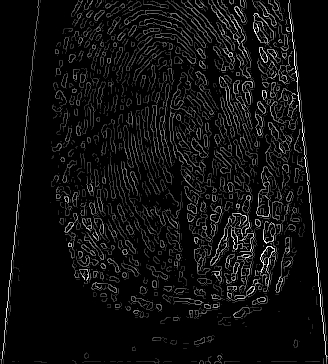

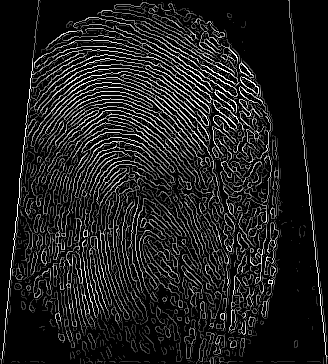

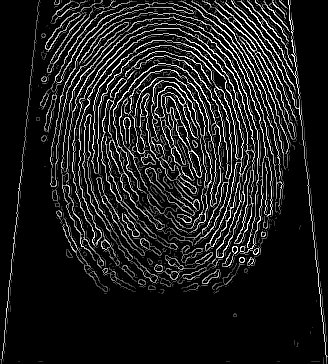

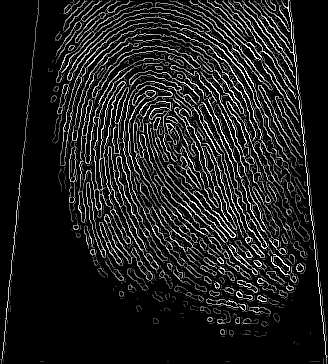

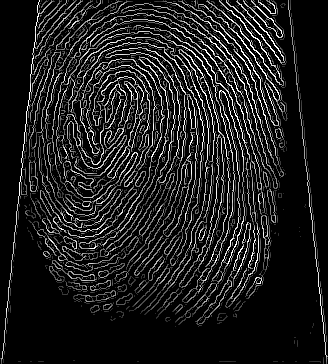

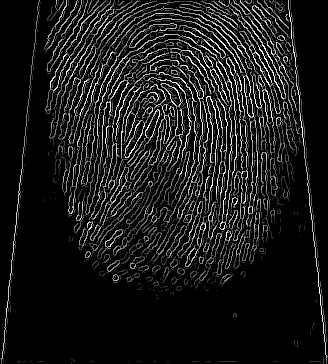

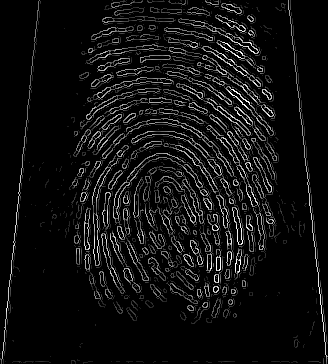

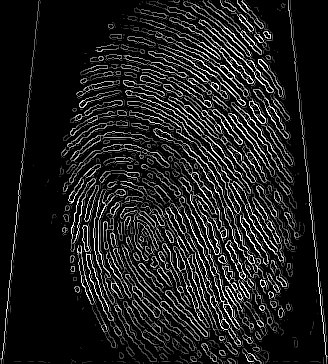

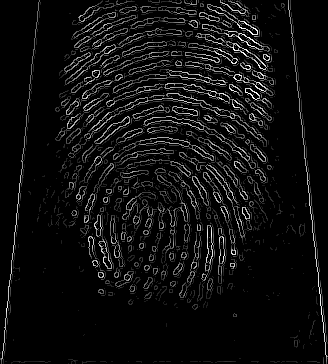

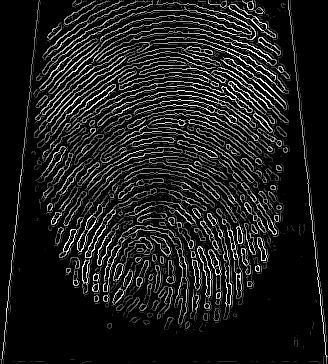

In [66]:
for i in range(10):
  cv2_imshow(CannyImages[i])